In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
historicalTourneySeeds = pd.read_csv('data/MNCAATourneySeeds.csv')
seeds24 = pd.read_csv('data/2024_tourney_seeds.csv')
mRegDetail = pd.read_csv('data/MRegularSeasonDetailedResults.csv')
tourneyCompact = pd.read_csv('data/MNCAATourneyCompactResults.csv')
display(mRegDetail)

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  \
0         2003      10     1104      68     1328      62    N      0    27   
1         2003      10     1272      70     1393      63    N      0    26   
2         2003      11     1266      73     1437      61    N      0    24   
3         2003      11     1296      56     1457      50    N      0    18   
4         2003      11     1400      77     1208      71    N      0    30   
...        ...     ...      ...     ...      ...     ...  ...    ...   ...   
111812    2024     100     1424      67     1201      65    A      0    24   
111813    2024     100     1429      84     1461      76    A      0    30   
111814    2024     100     1454      71     1156      68    A      0    26   
111815    2024     100     1459      73     1273      60    A      0    28   
111816    2024     100     1464      87     1352      77    H      0    29   

        WFGA  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0         58  ...     10    16    22   10   22     8   18     9     2   20  
1         62  ...     24     9    20   20   25     7   12     8     6   16  
2         58  ...     26    14    23   31   22     9   12     2     5   23  
3         38  ...     22     8    15   17   20     9   19     4     3   23  
4         61  ...     16    17    27   21   15    12   10     7     1   14  
...      ...  ...    ...   ...   ...  ...  ...   ...  ...   ...   ...  ...  
111812    44  ...     21    14    18    3   13    15    4     8     0   16  
111813    53  ...     25    11    16   10   23    13    8     7     0   19  
111814    52  ...     23     9    14   16   17    11    8    12     3   18  
111815    54  ...     19     8    15    8   18    10   10     4     1   13  
111816    73  ...     24    13    18   11   22    16    6     1     4   20  

[111817 rows x 34 columns]

In [3]:
display(mRegDetail.columns.values)

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [4]:
winTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Score', 'OppScore',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

In [5]:
winTeams[columns] = mRegDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

winTeams['Wins'] = 1
winTeams['Losses'] = 0

LoseTeams[columns] = mRegDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

def changeLocation(location):
    if location == 'H':
        return 'A'
    elif location == 'A':
        return 'H'
    else:
        return 'N'
    
LoseTeams['Loc'] = LoseTeams['Loc'].apply(changeLocation) 

LoseTeams['Wins'] = 0
LoseTeams['Losses'] = 1

mAllRegDetail = pd.concat([winTeams, LoseTeams])

In [6]:
seasonDetails = mAllRegDetail.groupby(['Season', 'TeamID']).sum(numeric_only=True)
seasonDetails['NumGames'] = seasonDetails['Wins'] + seasonDetails['Losses']
display(seasonDetails.columns.values)

array(['Score', 'OppScore', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM',
       'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM',
       'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR',
       'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk', 'OppPF', 'Wins',
       'Losses', 'NumGames'], dtype=object)

In [7]:
mRegSeasonInput = pd.DataFrame()

# Building some useful features not found already in the dataset
mRegSeasonInput['WinRatio'] = seasonDetails['Wins'] / seasonDetails['NumGames']
mRegSeasonInput['PointsPerGame'] = seasonDetails['Score'] / seasonDetails['NumGames']
mRegSeasonInput['PointsAllowedPerGame'] = seasonDetails['OppScore'] / seasonDetails['NumGames']
mRegSeasonInput['PointsRatio'] = seasonDetails['Score'] / seasonDetails['OppScore']
mRegSeasonInput['OTsPerGame'] = seasonDetails['NumOT'] / seasonDetails['NumGames']

# Transforming features already present
mRegSeasonInput['FGMPerGame'] = seasonDetails['FGM'] / seasonDetails['NumGames']
mRegSeasonInput['FGMRatio'] = seasonDetails['FGM'] / seasonDetails['FGA']
mRegSeasonInput['FGAllowedPerGame'] = seasonDetails['OppFGM'] / seasonDetails['NumGames']

mRegSeasonInput['FG3MPerGame'] = seasonDetails['FGM3'] / seasonDetails['NumGames']
mRegSeasonInput['FG3MRatio'] = seasonDetails['FGM3'] / seasonDetails['FGA3']
mRegSeasonInput['FG3AllowedPerGame'] = seasonDetails['OppFGM3'] / seasonDetails['NumGames']

mRegSeasonInput['FTMPerGame'] = seasonDetails['FTM'] / seasonDetails['NumGames']
mRegSeasonInput['FTMRatio'] = seasonDetails['FTM'] / seasonDetails['FTA']
mRegSeasonInput['FTAllowedPerGame'] = seasonDetails['OppFTM'] / seasonDetails['NumGames']

mRegSeasonInput['ORRatio'] = seasonDetails['OR'] / (seasonDetails['OR'] + seasonDetails['OppDR'])
mRegSeasonInput['DRRatio'] = seasonDetails['DR'] / (seasonDetails['DR'] + seasonDetails['OppOR'])
mRegSeasonInput['AstPerGame'] = seasonDetails['Ast'] / seasonDetails['NumGames']
mRegSeasonInput['TOPerGame'] = seasonDetails['TO'] / seasonDetails['NumGames']
mRegSeasonInput['StlPerGame'] = seasonDetails['Stl'] / seasonDetails['NumGames']
mRegSeasonInput['BlkPerGame'] = seasonDetails['Blk'] / seasonDetails['NumGames']
mRegSeasonInput['PFPerGame'] = seasonDetails['PF'] / seasonDetails['NumGames']

display(mRegSeasonInput)
display(mRegSeasonInput.describe())

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2024   1474    0.320000      77.120000             84.080000     0.917222   
       1475    0.181818      66.454545             74.863636     0.887675   
       1476    0.080000      63.040000             78.160000     0.806551   
       1477    0.272727      66.136364             76.545455     0.864014   
       1478    0.333333      70.761905             74.380952     0.951344   

               OTsPerGame  FGMPerGame  FGMRatio  FGAllowedPerGame  \
Season TeamID                                                       
2003   1102      0.000000   19.142857  0.481149         19.285714   
       1103      0.296296   27.148148  0.486074         27.777778   
       1104      0.035714   24.035714  0.420362         23.250000   
       1105      0.153846   24.384615  0.395755         27.000000   
       1106      0.035714   23.428571  0.423773         21.714286   
...                   ...         ...       ...               ...   
2024   1474      0.000000   27.080000  0.432312         30.960000   
       1475      0.045455   22.090909  0.399343         24.136364   
       1476      0.040000   22.680000  0.391845         27.000000   
       1477      0.227273   23.136364  0.388253         26.545455   
       1478      0.000000   25.095238  0.423633         26.952381   

               FG3MPerGame  FG3MRatio  ...  FTMPerGame  FTMRatio  \
Season TeamID                          ...                         
2003   1102       7.821429   0.375643  ...   11.142857  0.651357   
       1103       5.444444   0.338710  ...   19.037037  0.736390   
       1104       6.357143   0.320144  ...   14.857143  0.709898   
       1105       7.576923   0.364815  ...   15.423077  0.705986   
       1106       6.107143   0.346154  ...   10.642857  0.646421   
...                    ...        ...  ...         ...       ...   
2024   1474       8.160000   0.320251  ...   14.800000  0.706107   
       1475       6.409091   0.326389  ...   15.863636  0.733193   
       1476       8.360000   0.305556  ...    9.320000  0.706061   
       1477       8.500000   0.298722  ...   11.363636  0.688705   
       1478       9.809524   0.357639  ...   10.761905  0.773973   

               FTAllowedPerGame   ORRatio   DRRatio  AstPerGame  TOPerGame  \
Season TeamID                                                                
2003   1102           13.678571  0.171806  0.636486   13.000000  11.428571   
       1103           15.925926  0.307334  0.623407   15.222222  12.629630   
       1104           12.142857  0.374753  0.687179   12.107143  13.285714   
       1105           16.384615  0.338476  0.636653   14.538462  18.653846   
       1106           15.535714  0.354639  0.678173   11.678571  17.035714   
...                         ...       ...       ...         ...        ...   
2024   1474           14.200000  0.247375  0.712379   12.360000  11.440000   
       1475           19.681818  0.267045  0.756534   10.909091  13.863636   
       1476           13.920000  0.199525  0.689024   11.480000  13.440000   
       1477           17.272727  0.217219  0.687117   13.136364  11.500000   
       1478           11.666667  0.226608  0.699695   15.142857  11.000000   

               StlPerGame  BlkPerGame  PFPerGame  
Season TeamID                                     
2003   1102      5.964286    1.785714  18.750000  
       1103      7.259259    2.333333  19.851852  
       1104

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
count  7617.000000    7617.000000           7617.000000  7617.000000   
mean      0.494229      69.667363             69.879295     1.001157   
std       0.187188       5.815316              5.514027     0.095843   
min       0.000000      49.240000             50.428571     0.625313   
25%       0.357143      65.733333             66.187500     0.935468   
50%       0.500000      69.645161             69.764706     0.997490   
75%       0.631579      73.516129             73.419355     1.064548   
max       1.000000      95.551724             98.206897     1.388011   

        OTsPerGame   FGMPerGame     FGMRatio  FGAllowedPerGame  FG3MPerGame  \
count  7617.000000  7617.000000  7617.000000       7617.000000  7617.000000   
mean      0.068836    24.528801     0.436415         24.598917     6.736685   
std       0.060007     2.170283     0.026320          2.207380     1.400602   
min       0.000000    16.120000     0.342072         16.962963     1.838710   
25%       0.031250    23.066667     0.418845         23.068966     5.750000   
50%       0.062500    24.500000     0.436584         24.535714     6.656250   
75%       0.100000    25.939394     0.453815         26.000000     7.656250   
max       0.400000    34.153846     0.550868         37.200000    13.250000   

         FG3MRatio  ...   FTMPerGame     FTMRatio  FTAllowedPerGame  \
count  7617.000000  ...  7617.000000  7617.000000       7617.000000   
mean      0.342435  ...    13.873077     0.698839         13.930561   
std       0.028523  ...     2.135939     0.039396          2.194812   
min       0.247772  ...     7.000000     0.542461          7.433333   
25%       0.323185  ...    12.387097     0.672811         12.384615   
50%       0.341865  ...    13.827586     0.700000         13.818182   
75%       0.361664  ...    15.294118     0.725869         15.366667   
max       0.450602  ...    21.484848     0.825641         23.518519   

           ORRatio      DRRatio   AstPerGame    TOPerGame   StlPerGame  \
count  7617.000000  7617.000000  7617.000000  7617.000000  7617.000000   
mean      0.304956     0.693517    13.019444    13.364812     6.483046   
std       0.047823     0.039729     1.862354     1.890602     1.254999   
min       0.124726     0.554890     7.272727     7.387097     2.875000   
25%       0.272883     0.665647    11.720000    12.090909     5.588235   
50%       0.307927     0.691347    12.903226    13.258065     6.387097   
75%       0.339062     0.720212    14.235294    14.562500     7.258065   
max       0.453014     0.826561    21.484848    22.321429    13.241379   

        BlkPerGame    PFPerGame  
count  7617.000000  7617.000000  
mean      3.303760    17.753873  
std       1.074111     3.353732  
min       0.655172     0.000000  
25%       2.533333    16.827586  
50%       3.187500    18.218750  
75%       3.935484    19.535714  
max       9.333333    27.884615  

[8 rows x 21 columns]

In [8]:
# Compare teams in previous tournaments
seedDict = historicalTourneySeeds.set_index(['Season', 'TeamID'])

winnersTourney = pd.DataFrame()
winnersTourney[['Season', 'Team1', 'Team2']] = tourneyCompact[['Season', 'WTeamID', 'LTeamID']]
winnersTourney['Result'] = 1

lossersTourney = pd.DataFrame()
lossersTourney[['Season', 'Team1', 'Team2']] = tourneyCompact[['Season', 'LTeamID', 'WTeamID']]
lossersTourney['Result'] = 0

tourneyInput = pd.concat([winnersTourney, lossersTourney])
tourneyInput = tourneyInput[tourneyInput['Season'] >= 2003].reset_index(drop=True)

team1Seeds = []
team2Seeds = []

for x in range(len(tourneyInput)):
    idx = tourneyInput['Season'][x], tourneyInput['Team1'][x]
    seed = seedDict.loc[idx].values[0]
    
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team1Seeds.append(seed)
    
    idx = tourneyInput['Season'][x], tourneyInput['Team2'][x]
    seed = seedDict.loc[idx].values[0]
    
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team2Seeds.append(seed)
    
tourneyInput['Team1Seed'] = team1Seeds
tourneyInput['Team2Seed'] = team2Seeds

display(tourneyInput)

Season  Team1  Team2  Result  Team1Seed  Team2Seed
0       2003   1421   1411       1         16         16
1       2003   1112   1436       1          1         16
2       2003   1113   1272       1         10          7
3       2003   1141   1166       1         11          6
4       2003   1143   1301       1          8          9
...      ...    ...    ...     ...        ...        ...
2625    2023   1400   1274       0          2          5
2626    2023   1166   1361       0          6          5
2627    2023   1274   1163       0          5          4
2628    2023   1194   1361       0          9          5
2629    2023   1361   1163       0          5          4

[2630 rows x 6 columns]

In [9]:
outscores = []

for x in range(len(tourneyInput)):
    idx = tourneyInput['Season'][x], tourneyInput['Team1'][x]
    team1Score = mRegSeasonInput.loc[idx]
    team1Score['Seed'] = tourneyInput['Team1Seed'][x]
    
    idx = tourneyInput['Season'][x], tourneyInput['Team2'][x]
    team2Score = mRegSeasonInput.loc[idx]
    team2Score['Seed'] = tourneyInput['Team2Seed'][x]
    
    outscore = team1Score - team2Score
    outscore['Result'] = tourneyInput['Result'][x]
    outscores.append(outscore)

C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\510690928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1Score['Seed'] = tourneyInput['Team1Seed'][x]
C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\510690928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1Score['Seed'] = tourneyInput['Team1Seed'][x]
C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\510690928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te

In [10]:
outscores = pd.DataFrame(outscores)
display(outscores)
display(outscores.describe())

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  OTsPerGame  \
0    -0.151724      -1.593103              7.614943    -0.120072    0.139080   
1     0.237685      17.421182              7.112069     0.139285    0.002463   
2    -0.172414       1.448276              3.344828    -0.033801    0.034483   
3    -0.085684       0.102403              8.908046    -0.148414   -0.030303   
4     0.124138       2.082759              1.758621     0.003015    0.070115   
...        ...            ...                   ...          ...         ...   
2625 -0.016544      -1.553309             -4.713235     0.053933    0.056985   
2626 -0.176136       5.292614              4.672348     0.001005   -0.001894   
2627  0.023674       0.951705              7.094697    -0.105477    0.031250   
2628  0.093750       6.812500              1.468750     0.079202    0.000000   
2629  0.054924      -7.110795             -1.217803    -0.088409    0.062500   

      FGMPerGame  FGMRatio  FGAllowedPerGame  FG3MPerGame  FG3MRatio  ...  \
0      -0.354023 -0.018262          2.126437     0.549425   0.039433  ...   
1       5.493842  0.016969          3.598522     1.759852   0.009777  ...   
2       0.931034  0.040251          1.517241    -3.000000  -0.030989  ...   
3      -2.076280  0.005763          2.466040    -1.142111  -0.008284  ...   
4       3.011494  0.009399          1.945977    -1.552874   0.022444  ...   
...          ...       ...               ...          ...        ...  ...   
2625   -0.762868 -0.017130         -3.406250    -0.446691  -0.028713  ...   
2626    2.421402  0.025867          3.733902     2.096591   0.016005  ...   
2627    1.362689  0.025980          4.603220    -1.406250   0.010654  ...   
2628    2.812500  0.026823          0.812500     2.906250   0.028607  ...   
2629   -2.512311 -0.018417          0.478220    -2.187500  -0.013123  ...   

      FTAllowedPerGame   ORRatio   DRRatio  AstPerGame  TOPerGame  StlPerGame  \
0             3.274713 -0.015697 -0.047099   -1.165517   0.973563    0.635632   
1             0.662562  0.022337 -0.050163    3.435961   0.716749    1.602217   
2             0.758621  0.026172  0.001629   -1.068966   0.206897   -2.172414   
3             3.889237  0.021658 -0.021651   -1.197492   4.877743   -1.290491   
4            -3.503448  0.015999  0.009181    1.333333  -0.027586   -1.214943   
...                ...       ...       ...         ...        ...         ...   
2625          3.191176 -0.028062 -0.001011    0.974265   0.091912    0.715074   
2626         -2.783144 -0.062637  0.018865    2.877841   0.063447   -1.882576   
2627         -4.734848 -0.078784 -0.041578   -2.335227  -1.395833    0.798295   
2628         -0.156250 -0.018149  0.010743    1.187500   0.187500   -0.625000   
2629         -3.641098 -0.073282 -0.013852   -4.241477  -1.427083    0.579545   

      BlkPerGame  PFPerGame  Seed  Result  
0       0.766667   0.803448   0.0     1.0  
1       1.248768   1.853448 -15.0     1.0  
2      -0.827586   0.655172   3.0     1.0  
3      -0.454545   3.692790   5.0     1.0  
4      -0.273563  -1.563218  -1.0     1.0  
...          ...        ...   ...     ...  
2625    0.365809   3.211397  -3.0     0.0  
2626    0.463068  -3.348485   1.0     0.0  
2627   -1.597538  -3.714962   1.0     0.0  
2628   -1.187500  -0.656250   4.0     0.0  
2629   -1.160038  -1.621212   1.0     0.0  

[2630 rows x 23 columns]

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
count  2.630000e+03    2630.000000           2630.000000  2630.000000   
mean   2.701683e-18       0.000000              0.000000     0.000000   
std    1.451963e-01       7.270628              6.346061     0.105903   
min   -6.333333e-01     -22.892857            -25.035714    -0.400489   
25%   -9.375000e-02      -4.804228             -4.330466    -0.065623   
50%    0.000000e+00       0.000000              0.000000     0.000000   
75%    9.375000e-02       4.804228              4.330466     0.065623   
max    6.333333e-01      22.892857             25.035714     0.400489   

         OTsPerGame    FGMPerGame     FGMRatio  FGAllowedPerGame  \
count  2.630000e+03  2.630000e+03  2630.000000      2.630000e+03   
mean  -6.754209e-19  4.322693e-17     0.000000      2.161347e-17   
std    7.231797e-02  2.920791e+00     0.032729      2.675555e+00   
min   -2.931689e-01 -9.357143e+00    -0.135937     -9.978610e+00   
25%   -3.510436e-02 -1.991588e+00    -0.021775     -1.742857e+00   
50%    0.000000e+00  0.000000e+00     0.000000      0.000000e+00   
75%    3.510436e-02  1.991588e+00     0.021775      1.742857e+00   
max    2.931689e-01  9.357143e+00     0.135937      9.978610e+00   

        FG3MPerGame     FG3MRatio  ...  FTAllowedPerGame      ORRatio  \
count  2.630000e+03  2.630000e+03  ...       2630.000000  2630.000000   
mean   1.080673e-17  3.377104e-19  ...          0.000000     0.000000   
std    1.807792e+00  3.734034e-02  ...          2.794634     0.056387   
min   -6.062500e+00 -1.397601e-01  ...        -10.009091    -0.191864   
25%   -1.210596e+00 -2.368430e-02  ...         -1.953780    -0.037498   
50%    0.000000e+00  0.000000e+00  ...          0.000000     0.000000   
75%    1.210596e+00  2.368430e-02  ...          1.953780     0.037498   
max    6.062500e+00  1.397601e-01  ...         10.009091     0.191864   

            DRRatio    AstPerGame     TOPerGame    StlPerGame   BlkPerGame  \
count  2.630000e+03  2.630000e+03  2.630000e+03  2.630000e+03  2630.000000   
mean   8.442761e-20 -4.322693e-17  2.161347e-17 -1.080673e-17     0.000000   
std    4.064012e-02  2.607661e+00  2.076945e+00  1.876657e+00     1.800714   
min   -1.449883e-01 -9.220143e+00 -7.666667e+00 -6.283681e+00    -6.752688   
25%   -2.739454e-02 -1.768659e+00 -1.353608e+00 -1.261990e+00    -1.154326   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
75%    2.739454e-02  1.768659e+00  1.353608e+00  1.261990e+00     1.154326   
max    1.449883e-01  9.220143e+00  7.666667e+00  6.283681e+00     6.752688   

          PFPerGame         Seed       Result  
count  2.630000e+03  2630.000000  2630.000000  
mean   4.322693e-17     0.000000     0.500000  
std    2.483130e+00     7.486161     0.500095  
min   -7.896552e+00   -15.000000     0.000000  
25%   -1.729320e+00    -5.000000     0.000000  
50%    0.000000e+00     0.000000     0.500000  
75%    1.729320e+00     5.000000     1.000000  
max    7.896552e+00    15.000000     1.000000  

[8 rows x 23 columns]

WinRatio                0.33
PointsPerGame           0.23
PointsAllowedPerGame    0.16
PointsRatio             0.40
OTsPerGame              0.12
FGMPerGame              0.26
FGMRatio                0.20
FGAllowedPerGame        0.09
FG3MPerGame             0.06
FG3MRatio               0.10
FG3AllowedPerGame       0.07
FTMPerGame              0.02
FTMRatio                0.05
FTAllowedPerGame        0.15
ORRatio                 0.21
DRRatio                 0.03
AstPerGame              0.20
TOPerGame               0.15
StlPerGame              0.10
BlkPerGame              0.20
PFPerGame               0.16
Seed                    0.48
Result                  1.00
Name: Result, dtype: float64

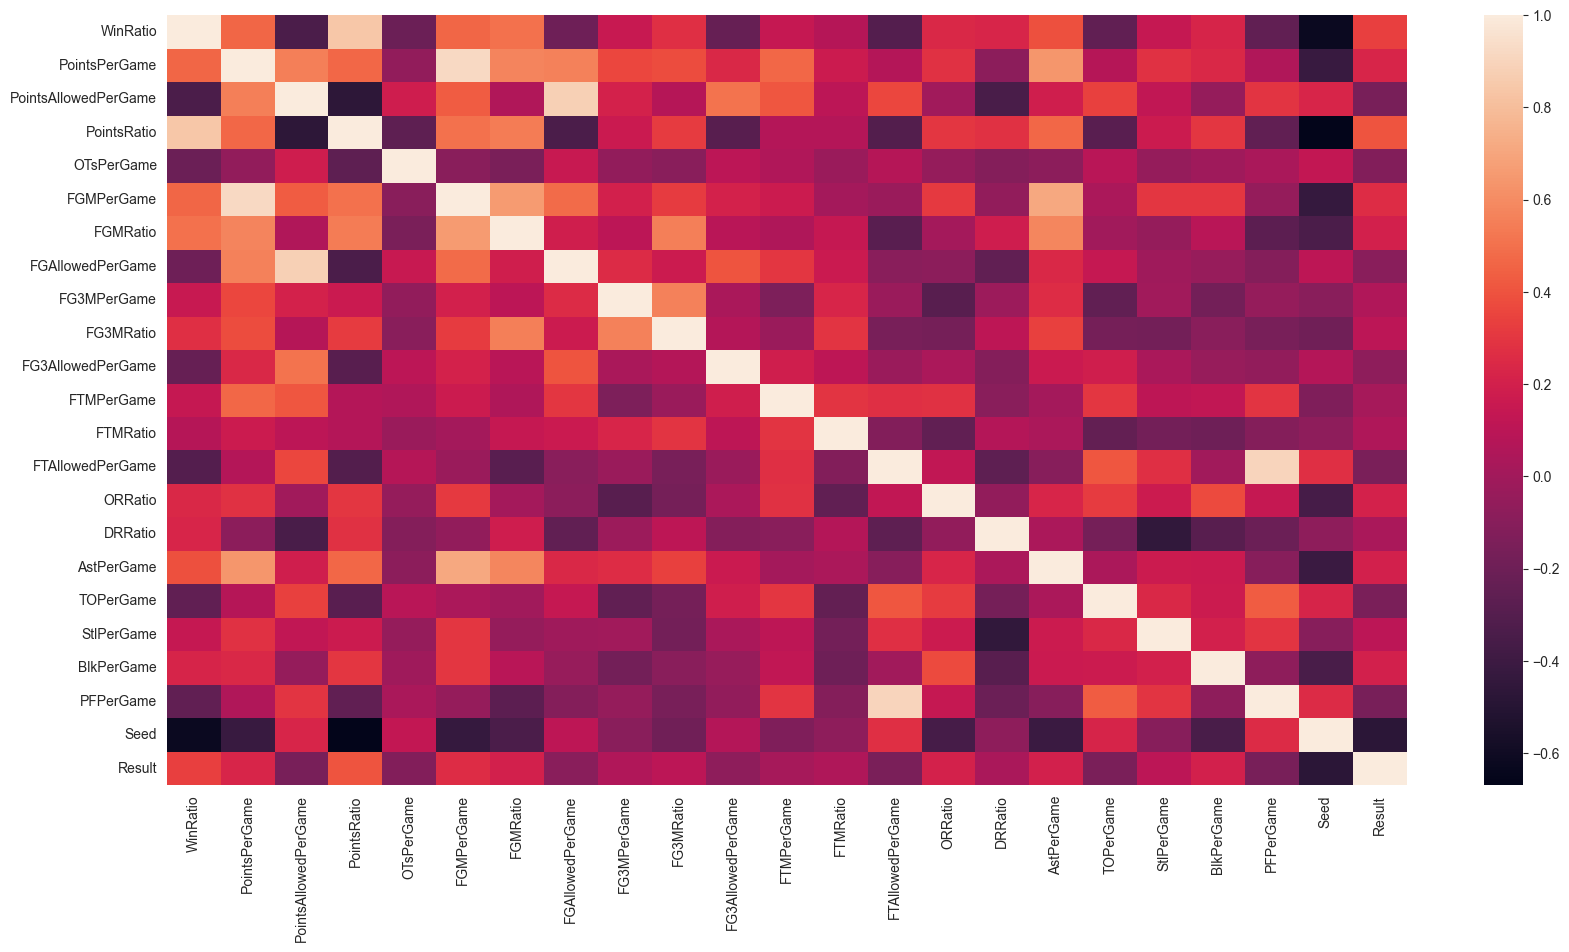

In [11]:
corrs = round(outscores.corr(), 2)
display(np.abs(corrs['Result']))

plt.figure(figsize=(20,10))
sns.heatmap(corrs)
plt.show()

In [12]:
X = outscores[outscores.columns[:-1]].values
y = outscores['Result'].values

# Split the data
np.random.seed(1)
idx = np.random.permutation(len(X))

train_idx = idx[:int(-.2*len(X))]
test_idx = idx[int(-.2*len(X)):]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

#Scale the data
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

X_train = (X_train - mins) / (maxs - mins)
X_test = (X_test - mins) / (maxs - mins)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2104, 22) (526, 22) (2104,) (526,)


In [13]:
model = RandomForestClassifier(random_state=1)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7034220532319392

In [14]:
mTourneySeeds24 = seeds24[seeds24['Tournament'] == 'M']
display(mTourneySeeds24)

Tournament Seed  TeamID
0           M  W01    1163
1           M  W02    1235
2           M  W03    1228
3           M  W04    1120
4           M  W05    1361
..        ...  ...     ...
59          M  Z12    1241
60          M  Z13    1436
61          M  Z14    1324
62          M  Z15    1443
63          M  Z16    1255

[64 rows x 3 columns]

In [15]:
mRegSeasonInput24 = mRegSeasonInput.loc[2024]
display(mRegSeasonInput24)
display(mRegSeasonInput24.describe())

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
TeamID                                                               
1101    0.318182      70.409091             75.590909     0.931449   
1102    0.333333      67.916667             71.041667     0.956012   
1103    0.727273      72.818182             65.909091     1.104828   
1104    0.708333      90.291667             76.875000     1.174526   
1105    0.250000      69.000000             80.000000     0.862500   
...          ...            ...                   ...          ...   
1474    0.320000      77.120000             84.080000     0.917222   
1475    0.181818      66.454545             74.863636     0.887675   
1476    0.080000      63.040000             78.160000     0.806551   
1477    0.272727      66.136364             76.545455     0.864014   
1478    0.333333      70.761905             74.380952     0.951344   

        OTsPerGame  FGMPerGame  FGMRatio  FGAllowedPerGame  FG3MPerGame  \
TeamID                                                                    
1101      0.136364   24.227273  0.410000         26.363636     5.181818   
1102      0.083333   23.791667  0.457532         24.500000     9.000000   
1103      0.045455   25.409091  0.454102         24.136364     7.772727   
1104      0.000000   30.250000  0.480477         26.541667    11.583333   
1105      0.041667   22.916667  0.412913         25.708333     4.291667   
...            ...         ...       ...               ...          ...   
1474      0.000000   27.080000  0.432312         30.960000     8.160000   
1475      0.045455   22.090909  0.399343         24.136364     6.409091   
1476      0.040000   22.680000  0.391845         27.000000     8.360000   
1477      0.227273   23.136364  0.388253         26.545455     8.500000   
1478      0.000000   25.095238  0.423633         26.952381     9.809524   

        FG3MRatio  ...  FTMPerGame  FTMRatio  FTAllowedPerGame   ORRatio  \
TeamID             ...                                                     
1101     0.327586  ...   16.772727  0.726378         16.772727  0.223785   
1102     0.373057  ...   11.333333  0.674938         14.458333  0.245142   
1103     0.330754  ...   14.227273  0.733021         11.363636  0.272162   
1104     0.382393  ...   18.208333  0.794545         16.666667  0.341591   
1105     0.288515  ...   18.875000  0.713386         20.583333  0.289873   
...           ...  ...         ...       ...               ...       ...   
1474     0.320251  ...   14.800000  0.706107         14.200000  0.247375   
1475     0.326389  ...   15.863636  0.733193         19.681818  0.267045   
1476     0.305556  ...    9.320000  0.706061         13.920000  0.199525   
1477     0.298722  ...   11.363636  0.688705         17.272727  0.217219   
1478     0.357639  ...   10.761905  0.773973         11.666667  0.226608   

         DRRatio  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  PFPerGame  
TeamID                                                                      
1101    0.696350   11.181818  12.454545    8.045455    1.954545  20.409091  
1102    0.722963   15.125000  11.166667    6.875000    4.000000  17.208333  
1103    0.762332   12.318182  10.590909    5.863636    2.818182  16.772727  
1104    0.729469   15.625000  12.166667    7.625000    4.083333  19.125000  
1105    0.670902    9.875000  15.750000    7.625000    3.708333  21.666667  
...          ...         ...        ...         ...         ...        ...  
1474    0.712379   12.360000  11.440000    6.680000    2.880000  17.600000  
1475    0.756534   10.909091  13.863636    5.863636    2.681818  21.681818  
1476    0.689024   11.480000  13.440000    6.840000    2.280000  15.800000  
1477    0.687117   13.136364  11.500000    7.409091    4.772727  18.318182  
1478    0.699695   15.142857  11.000000    7.380952    2.904762  15.809524  

[362 rows x 21 columns]

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
count  362.000000     362.000000            362.000000   362.000000   
mean     0.497676      72.579810             72.698595     1.002476   
std      0.186922       5.657097              4.890814     0.098932   
min      0.000000      54.333333             54.708333     0.677755   
25%      0.360000      68.886190             69.182518     0.938175   
50%      0.520000      72.292174             72.738636     0.995714   
75%      0.634680      75.989130             75.873641     1.070998   
max      0.920000      90.291667             85.650000     1.345011   

       OTsPerGame  FGMPerGame    FGMRatio  FGAllowedPerGame  FG3MPerGame  \
count  362.000000  362.000000  362.000000        362.000000   362.000000   
mean     0.071019   25.737323    0.440595         25.778866     7.328246   
std      0.067542    2.122118    0.026756          2.001032     1.385579   
min      0.000000   19.750000    0.361895         18.000000     3.416667   
25%      0.000000   24.379076    0.423019         24.379076     6.409091   
50%      0.045455   25.543561    0.441133         25.759470     7.363636   
75%      0.095238   27.206250    0.458372         27.073370     8.215127   
max      0.380952   32.458333    0.526462         31.952381    11.625000   

        FG3MRatio  ...  FTMPerGame    FTMRatio  FTAllowedPerGame     ORRatio  \
count  362.000000  ...  362.000000  362.000000        362.000000  362.000000   
mean     0.335674  ...   13.776918    0.715364         13.795112    0.269832   
std      0.027936  ...    2.141464    0.036906          2.134913    0.043914   
min      0.250765  ...    8.541667    0.602941          8.333333    0.153947   
25%      0.317153  ...   12.348370    0.690615         12.294837    0.241895   
50%      0.336159  ...   13.674242    0.718869         13.646087    0.267869   
75%      0.355367  ...   15.125000    0.740347         15.114583    0.295302   
max      0.411531  ...   21.240000    0.817043         20.583333    0.428246   

          DRRatio  AstPerGame   TOPerGame  StlPerGame  BlkPerGame   PFPerGame  
count  362.000000  362.000000  362.000000  362.000000  362.000000  362.000000  
mean     0.728918   12.988994   11.450943    6.535465    3.392999   17.152358  
std      0.032357    2.084439    1.510399    1.333960    0.973583    1.750068  
min      0.638066    7.272727    7.833333    3.565217    1.136364   11.360000  
25%      0.706259   11.547554   10.366477    5.730237    2.708333   15.913043  
50%      0.728031   12.729167   11.447273    6.318182    3.291667   17.044466  
75%      0.752599   14.179842   12.416667    7.333333    3.960000   18.285714  
max      0.805774   19.541667   15.916667   11.142857    6.913043   22.227273  

[8 rows x 21 columns]

In [16]:
for x in range(len(mTourneySeeds24)):
    seed = mTourneySeeds24['Seed'][x]
    
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    mTourneySeeds24['Seed'][x] = seed
    
mTourneySeedDict24 = mTourneySeeds24.set_index('TeamID')['Seed'].to_dict()
print(len(mTourneySeedDict24))
print(mTourneySeedDict24)

64
{1163: 1, 1235: 2, 1228: 3, 1120: 4, 1361: 5, 1140: 6, 1450: 7, 1194: 8, 1321: 9, 1179: 10, 1182: 11, 1412: 12, 1463: 13, 1287: 14, 1355: 15, 1391: 16, 1314: 1, 1112: 2, 1124: 3, 1104: 4, 1388: 5, 1155: 6, 1173: 7, 1280: 8, 1277: 9, 1305: 10, 1307: 11, 1213: 12, 1158: 13, 1159: 14, 1253: 15, 1447: 16, 1345: 1, 1397: 2, 1166: 3, 1242: 4, 1211: 5, 1376: 6, 1400: 7, 1429: 8, 1395: 9, 1161: 10, 1332: 11, 1270: 12, 1359: 13, 1103: 14, 1389: 15, 1212: 16, 1222: 1, 1266: 2, 1246: 3, 1181: 4, 1458: 5, 1403: 6, 1196: 7, 1304: 8, 1401: 9, 1129: 10, 1301: 11, 1241: 12, 1436: 13, 1324: 14, 1443: 15, 1255: 16}


C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\561104575.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mTourneySeeds24['Seed'][x] = seed
C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\561104575.py:8: SettingWithCopyWarning: 
A va

In [21]:
# Pair every team against every other team for 2024
pairs = []

teams = list(mTourneySeedDict24.keys())

for i in range(len(teams)):
    for j in range(i + 1, len(teams)): # only add unique pairings
        pair = (teams[i], mTourneySeedDict24[teams[i]], teams[j], mTourneySeedDict24[teams[j]])
        pairs.append(pair)

tourneyInput24 = pd.DataFrame(pairs, columns=['Team1', 'Seed1', 'Team2', 'Seed2'])
print(len(tourneyInput24))

2016


In [22]:
outScores24 = []

for x in range(len(tourneyInput24)):
    team1ID = tourneyInput24['Team1'][x]
    team2ID = tourneyInput24['Team2'][x]
    
    team1Score = mRegSeasonInput.loc[2024, team1ID]
    team2Score = mRegSeasonInput.loc[2024, team2ID]
    
    team1Score['Seed'] = int(tourneyInput24['Seed1'][x])
    team2Score['Seed'] = int(tourneyInput24['Seed2'][x])
    
    outscore = team1Score - team2Score
    outScores24.append(outscore)

C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\2222735990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1Score['Seed'] = int(tourneyInput24['Seed1'][x])
C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\2222735990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1Score['Seed'] = int(tourneyInput24['Seed1'][x])
C:\Users\Trever\AppData\Local\Temp\ipykernel_2292\2222735990.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [23]:
outScores24 = pd.DataFrame(outScores24)
display(outScores24)
display(outScores24.describe())

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  OTsPerGame  \
0     0.128333       3.456667              2.120000     0.012003    0.000000   
1     0.170000      -1.001667             -6.213333     0.098789   -0.083333   
2     0.120000      -1.040000             -2.760000     0.037251    0.000000   
3     0.180870       6.866087             -3.793043     0.172562   -0.130435   
4     0.170000      -1.335000             -3.505000     0.046574    0.000000   
...        ...            ...                   ...          ...         ...   
2011  0.072464      -7.925466             -9.915114     0.038248    0.043478   
2012  0.217391      -2.260870             -4.347826     0.035738   -0.086957   
2013 -0.037037      -2.365079             -0.486772    -0.025051    0.148148   
2014  0.107890       3.299517              5.080515    -0.027560    0.017713   
2015  0.144928       5.664596              5.567288    -0.002510   -0.130435   

      FGMPerGame  FGMRatio  FGAllowedPerGame  FG3MPerGame  FG3MRatio  ...  \
0       1.076667  0.024362          1.531667     2.133333   0.012512  ...   
1      -0.090000  0.036708         -4.343333     0.175000   0.021703  ...   
2       0.440000  0.031712          0.120000     0.920000   0.029371  ...   
3       3.420870  0.051521         -1.586087     1.713043   0.041279  ...   
4      -1.006667  0.029333         -2.385000    -2.825000   0.006814  ...   
...          ...       ...               ...          ...        ...  ...   
2011   -3.387164 -0.012494         -2.559006     1.824017  -0.010295  ...   
2012   -0.217391  0.013605         -0.608696     3.260870   0.021148  ...   
2013   -1.989418 -0.016240          0.275132     1.994709   0.000426  ...   
2014    1.180354  0.009859          2.225443     3.431562   0.031869  ...   
2015    3.169772  0.026099          1.950311     1.436853   0.031443  ...   

      FTMRatio  FTAllowedPerGame   ORRatio   DRRatio  AstPerGame  TOPerGame  \
0     0.035088          1.251667  0.033265  0.040306    1.331667  -1.185000   
1    -0.001859          2.501667  0.009802 -0.001296    4.831667  -1.101667   
2    -0.030333         -2.520000  0.028303  0.049212    0.160000  -0.640000   
3    -0.000460          0.786087  0.060517  0.027413    5.605217  -1.038261   
4    -0.004643          1.710000  0.041093 -0.031051   -1.376667  -1.268333   
...        ...               ...       ...       ...         ...        ...   
2011  0.021087         -4.055901 -0.061881  0.027208    0.134576  -5.674948   
2012  0.049767         -3.173913 -0.171146  0.020183    0.869565  -4.217391   
2013  0.046312         -2.179894  0.025218 -0.033487    0.825397  -2.724868   
2014  0.074992         -1.297907 -0.084048 -0.040512    1.560386  -1.267311   
2015  0.028679          0.881988 -0.109265 -0.007025    0.734990   1.457557   

      StlPerGame  BlkPerGame  PFPerGame  Seed  
0      -4.353333    2.355000   0.590000  -1.0  
1       1.896667    1.355000   2.090000  -2.0  
2      -1.160000   -0.480000  -1.680000  -3.0  
3      -1.041739    1.827826  -0.986087  -4.0  
4       0.188333    2.688333  -0.326667  -5.0  
...          ...         ...        ...   ...  
2011   -2.072464    0.612836  -4.975155  -2.0  
2012   -1.565217    0.956522  -5.173913  -3.0  
2013   -0.777778   -0.582011  -3.529101  -1.0  
2014   -0.270531   -0.238325  -3.727858  -2.0  
2015    0.507246    0.343685  -0.198758  -1.0  

[2016 rows x 22 columns]

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
count  2016.000000    2016.000000           2016.000000  2016.000000   
mean      0.022526       1.114291             -0.314141     0.021582   
std       0.154060       8.140748              5.995764     0.113691   
min      -0.494048     -27.066667            -23.416667    -0.462936   
25%      -0.075000      -4.125865             -4.040199    -0.051526   
50%       0.030000       1.108188             -0.416667     0.025726   
75%       0.114130       6.486607              3.258220     0.093937   
max       0.539048      28.441667             22.166667     0.397401   

        OTsPerGame   FGMPerGame     FGMRatio  FGAllowedPerGame  FG3MPerGame  \
count  2016.000000  2016.000000  2016.000000       2016.000000  2016.000000   
mean      0.003445     0.308514     0.006173         -0.168459     0.245681   
std       0.091802     3.128330     0.034315          2.642421     1.960579   
min      -0.217391   -10.619048    -0.110449         -9.875000    -5.670290   
25%      -0.045455    -1.777174    -0.016033         -1.905495    -1.080616   
50%       0.000000     0.311667     0.005429         -0.207738     0.204545   
75%       0.051984     2.333333     0.027421          1.416667     1.500000   
max       0.217391    10.744048     0.112878          9.739130     6.672619   

         FG3MRatio  ...     FTMRatio  FTAllowedPerGame      ORRatio  \
count  2016.000000  ...  2016.000000       2016.000000  2016.000000   
mean      0.004181  ...     0.003259          0.137481     0.005233   
std       0.037325  ...     0.039115          2.483472     0.064646   
min      -0.098611  ...    -0.106773         -7.476190    -0.217477   
25%      -0.019606  ...    -0.024590         -1.543393    -0.034893   
50%       0.004280  ...     0.003500          0.094848     0.009232   
75%       0.027532  ...     0.030182          1.791667     0.051486   
max       0.134134  ...     0.124196          8.333333     0.225207   

           DRRatio   AstPerGame    TOPerGame   StlPerGame   BlkPerGame  \
count  2016.000000  2016.000000  2016.000000  2016.000000  2016.000000   
mean      0.005736     0.537881    -0.094170    -0.188531     0.279773   
std       0.038876     3.230747     1.767547     2.048407     1.338019   
min      -0.113323    -9.422619    -5.674948    -6.735000    -4.655000   
25%      -0.022176    -1.791395    -1.258399    -1.531548    -0.613231   
50%       0.004736     0.445523    -0.071758    -0.196667     0.333333   
75%       0.032587     2.800000     1.170621     1.131591     1.166667   
max       0.133926    11.255952     4.871377     7.193333     4.695000   

         PFPerGame         Seed  
count  2016.000000  2016.000000  
mean      0.011695    -1.349206  
std       2.212507     6.432322  
min      -8.163810   -15.000000  
25%      -1.439068    -6.000000  
50%       0.011128    -2.000000  
75%       1.488933     3.000000  
max       7.765000    15.000000  

[8 rows x 22 columns]

In [24]:
X24 = outScores24[outScores24.columns].values

# Scale the new data
XScaled24 = (X24 - mins) / (maxs - mins)

predictions = model.predict(XScaled24)
tourneyInput24['PredictedResult'] = predictions
tourneyInput24.head(100)

Team1  Seed1  Team2  Seed2  PredictedResult
0    1163      1   1235      2              1.0
1    1163      1   1228      3              1.0
2    1163      1   1120      4              1.0
3    1163      1   1361      5              1.0
4    1163      1   1140      6              1.0
..    ...    ...    ...    ...              ...
95   1235      2   1166      3              1.0
96   1235      2   1242      4              1.0
97   1235      2   1211      5              1.0
98   1235      2   1376      6              1.0
99   1235      2   1400      7              1.0

[100 rows x 5 columns]

In [28]:
#Add team names to predictions
finalOutput24 = tourneyInput24
teamSpellingsDf = pd.read_excel('data/MTeamSpellings.xlsx')

for index, row in tourneyInput24.iterrows():
    team1Spelling = teamSpellingsDf.loc[teamSpellingsDf['TeamID'] == row['Team1'], 'TeamNameSpelling'].iloc[0]
    team2Spelling = teamSpellingsDf.loc[teamSpellingsDf['TeamID'] == row['Team2'], 'TeamNameSpelling'].iloc[0]
    
    finalOutput24.at[index, 'Team1Spelling'] = team1Spelling
    finalOutput24.at[index, 'Team2Spelling'] = team2Spelling

display(finalOutput24)
finalOutput24.to_csv('output.csv')

Team1  Seed1  Team2  Seed2  PredictedResult Team1Spelling  Team2Spelling
0      1163      1   1235      2              1.0   connecticut        iowa st
1      1163      1   1228      3              1.0   connecticut       illinois
2      1163      1   1120      4              1.0   connecticut         auburn
3      1163      1   1361      5              1.0   connecticut   san diego st
4      1163      1   1140      6              1.0   connecticut  brigham young
...     ...    ...    ...    ...              ...           ...            ...
2011   1436     13   1443     15              1.0       vermont     w kentucky
2012   1436     13   1255     16              1.0       vermont       longwood
2013   1324     14   1443     15              1.0       oakland     w kentucky
2014   1324     14   1255     16              1.0       oakland       longwood
2015   1443     15   1255     16              1.0    w kentucky       longwood

[2016 rows x 7 columns]